In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/kyphosis-data/kyphosis.csv')

In [3]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
df['Kyphosis']=pd.get_dummies(data=df,columns=['Kyphosis'],drop_first=True,dtype=int)['Kyphosis_present']

# EDA

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     int64
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int64(4)
memory usage: 2.7 KB


In [7]:
df.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [8]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [9]:
sns.set_palette('gist_stern')

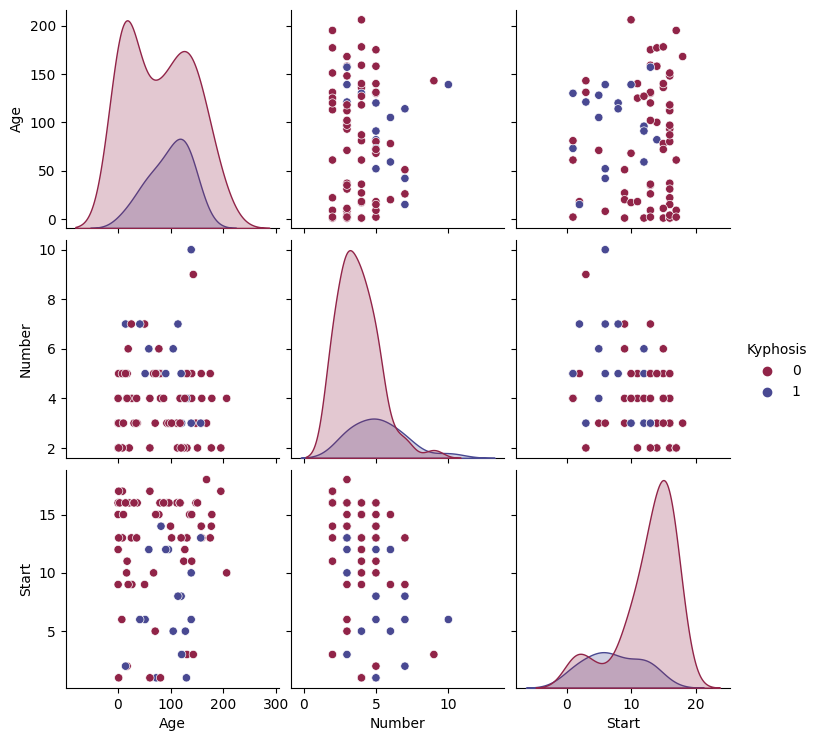

In [10]:
sns.pairplot(df,hue='Kyphosis')

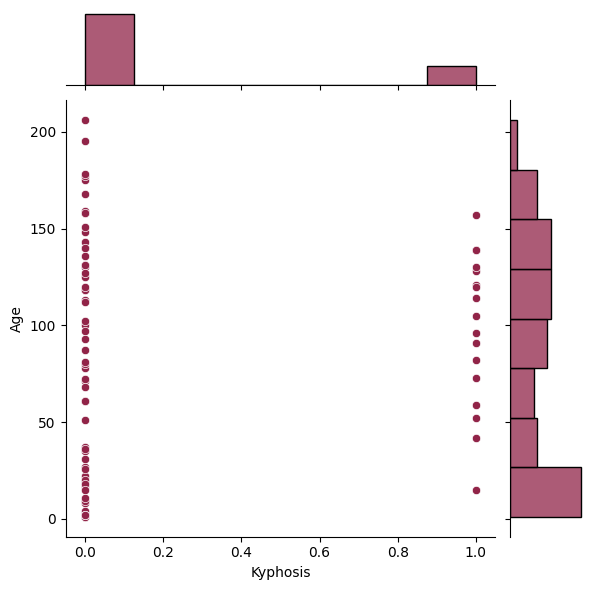

In [11]:
sns.jointplot(x='Kyphosis',y='Age',data=df)

<Axes: >

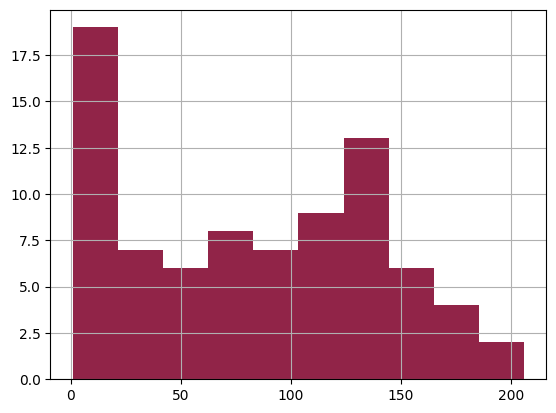

In [12]:
df['Age'].hist()

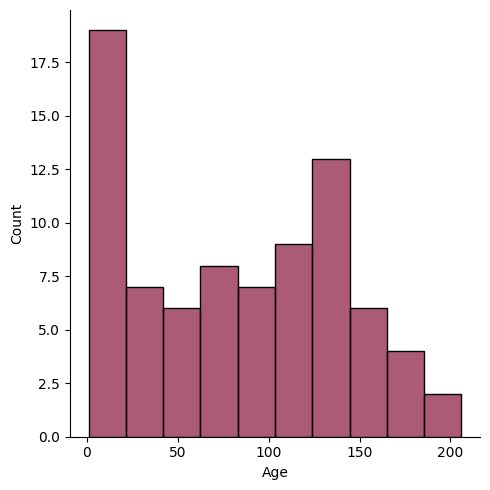

In [13]:
import warnings 
warnings.filterwarnings('ignore')
sns.displot(df['Age'],bins=10)

Text(0.5, 0, 'Kyphosis')

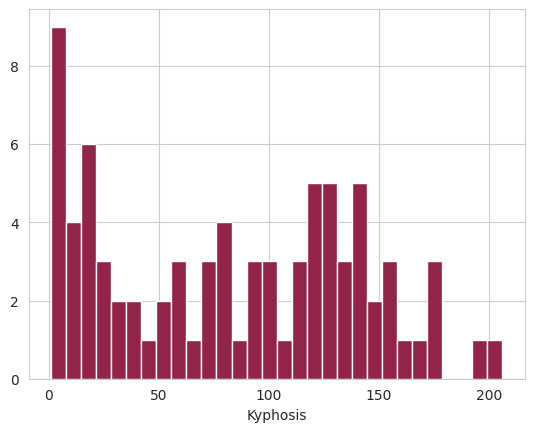

In [14]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Kyphosis')

<Axes: xlabel='Age'>

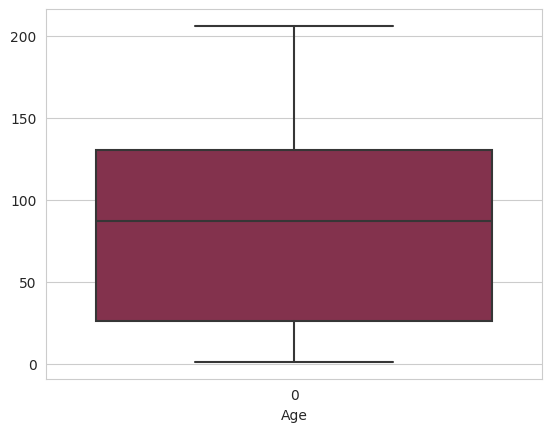

In [15]:
plt.xlabel('Age')
sns.boxplot(df['Age'])

<Axes: xlabel='Kyphosis', ylabel='count'>

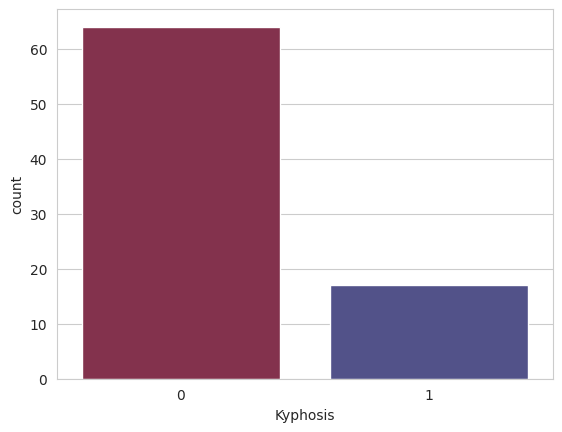

In [16]:
sns.countplot(df,x='Kyphosis')

<Axes: xlabel='Age', ylabel='Density'>

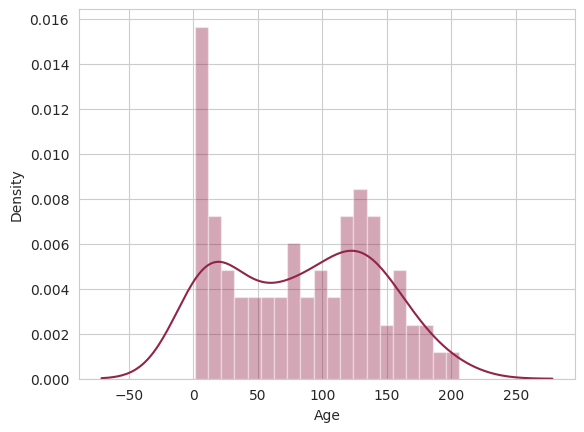

In [17]:
sns.distplot(df['Age'],bins=20)

In [18]:
df.value_counts()

Kyphosis  Age  Number  Start
0         1    2       16       1
          118  3       16       1
          175  5       13       1
          168  3       18       1
          159  4       13       1
                               ..
          61   2       17       1
          51   7       9        1
          37   3       16       1
          36   4       13       1
1         157  3       13       1
Name: count, Length: 81, dtype: int64

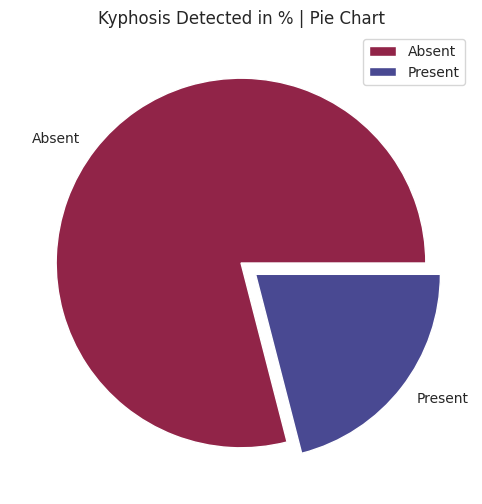

In [19]:
exp=[0,0.1]
plt.figure(figsize=(10,6))
plt.pie(round((df['Kyphosis'].value_counts()/len(df))*100,2),explode=exp,labels=['Absent','Present'])
plt.title('Kyphosis Detected in % | Pie Chart')
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

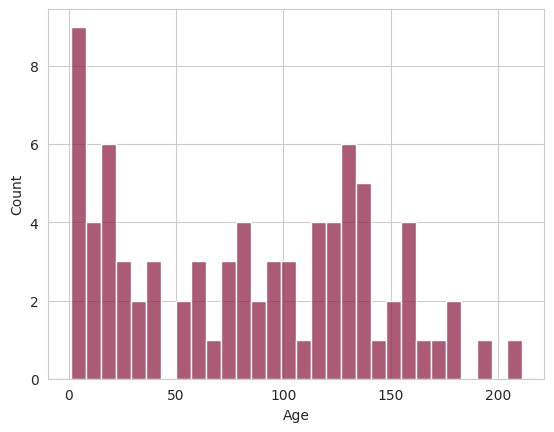

In [20]:
sns.histplot(data=df,x='Age',binwidth=7,bins=10)

<Axes: xlabel='Kyphosis', ylabel='Age'>

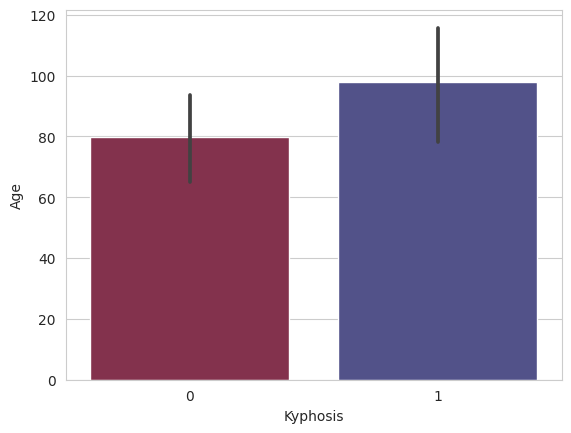

In [21]:
sns.barplot(x='Kyphosis',y='Age',data=df)

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [24]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree=DecisionTreeClassifier(
    min_samples_split=4,
    min_samples_leaf=4,)

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=4)

# Predictions and Evaluation

In [29]:
y_pred=dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.40      0.25      0.31         8

    accuracy                           0.64        25
   macro avg       0.55      0.54      0.53        25
weighted avg       0.60      0.64      0.61        25



In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rfc_pred=RandomForestClassifier(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df_kyphosis=pd.read_csv('/kaggle/input/kyphosis-data/kyphosis.csv')
# Prepare the data
X = df_kyphosis.drop('Kyphosis', axis=1)
y = df_kyphosis['Kyphosis'].apply(lambda x: 1 if x == 'present' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Create the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print('Best parameters found:\n', best_params)

# Train the best estimator on the training data
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = best_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print('Best parameters found for Random Forest:\:\n',best_params_rf)
# Train the best estimator on the training data
best_rf_clf = grid_search_rf.best_estimator_
best_rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = best_rf_clf.predict(X_test)

# Print classification report for Random Forest
print(classification_report(y_test,y_pred_rf))

Best parameters found:
 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25

Best parameters found for Random Forest:\:
 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

